In [1]:
import os

import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
neuro_data_path = '/run/media/nikita/e40c1d03-27f0-4c5f-b778-1710c9a842d0/data/server_sync/data/v6'
test_data = pd.read_csv(os.path.join(neuro_data_path, '0/data.csv'), index_col=0)
test_data.head()

,timestamps,k_inf,heat,Zn76,Y90_m1,La147,Tm168,Pm146,Y96,Sn123_m1,...,N14,Nd140,Y91_m1,Cd109,Nb99,Nb97_m1,Cs139,Tb157,Nb94,O15
0,0.0,1.239758,0.000199,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
1,21600.0,1.237493,60.895079,4.887365e+09,1.637540e+10,1.856578e+12,0.002154,2.934979e+06,1.009293e+13,1.846659e+13,...,8.668047e+05,1.470831e-12,1.342145e+15,0.000145,2.584369e+13,3.395246e+13,1.628974e+15,32847.159211,1.594874e+09,0.000000e+00
2,43200.0,1.232298,62.409700,4.885294e+09,2.081189e+10,1.858224e+12,0.015720,5.887099e+06,1.009476e+13,1.852333e+13,...,3.476532e+06,1.443680e-08,2.497974e+15,0.157184,2.584457e+13,6.051132e+13,1.628845e+15,65697.239362,3.205315e+09,1.658438e+07
3,64800.0,1.238025,63.237912,4.880762e+09,2.199428e+10,1.861790e+12,0.064360,8.895958e+06,1.009873e+13,1.856636e+13,...,7.848615e+06,1.371855e-08,3.249642e+15,0.168197,2.584650e+13,8.122621e+13,1.628563e+15,98535.528219,4.813631e+09,3.576378e-40
4,86400.0,1.232676,63.724331,4.884902e+09,2.233588e+10,1.858529e+12,0.167182,1.199876e+07,1.009510e+13,1.852721e+13,...,1.398478e+07,1.303691e-08,3.738148e+15,0.193054,2.584475e+13,9.739028e+13,1.628821e+15,131440.786919,6.423987e+09,7.712366e-87


In [3]:
with open('timestamps.txt', 'w') as f:
    f.write(', '.join((test_data.timestamps.values / 3600  ).astype(int).astype(str).tolist()))

<Axes: >

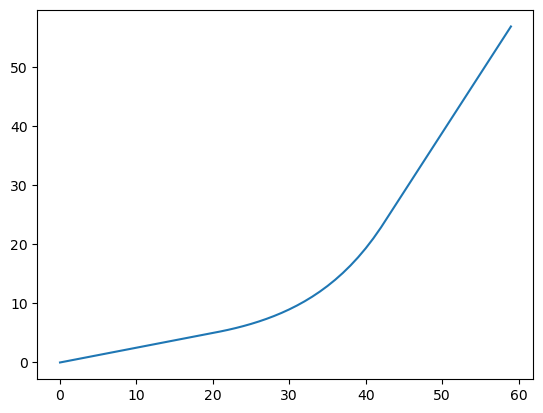

In [4]:
(test_data.head(60).timestamps/3600/24).plot()

Text(0, 0.5, 'Шаг по времени, ч')

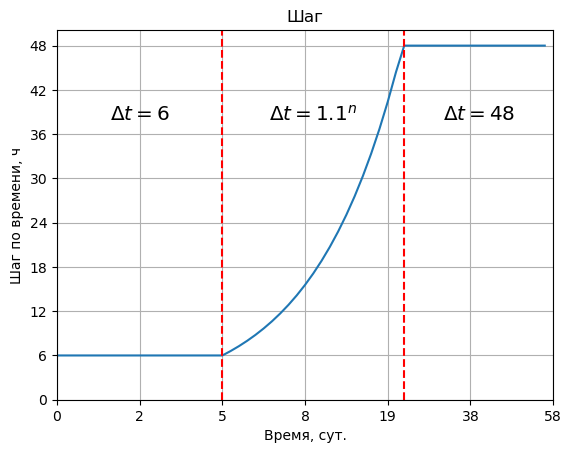

In [12]:
steps = test_data.timestamps.values[1:]-test_data.timestamps.values[:-1]

break1 = np.where(steps//3600 == 6)[0][-1]-1
break2 = np.where(steps//3600 == 48)[0][0]-1

times = test_data.timestamps.values/3600/24
num=60
ax = plt.subplot()
ax.set_xlim(0, num)
ax.plot(steps[:num]/3600)


xticks = ax.get_xticks()
xlabels = [int(times[int(tick)]) for tick in xticks]
ax.set_xticks(xticks, labels=xlabels)

ax.axvline(break1, color='r', linestyle='--')
ax.text(break1//2, 40, '$\Delta t = 6$', size='x-large', horizontalalignment='center', verticalalignment='top')
ax.axvline(break2, color='r', linestyle='--')
ax.text((break1 + break2)//2, 40, '$\Delta t = 1.1^n$', size='x-large', horizontalalignment='center', verticalalignment='top')
ax.text((xticks[-1] + break2)//2, 40, '$\Delta t = 48$', size='x-large', horizontalalignment='center', verticalalignment='top')


ax.set_yticks(range(0,50,6))
ax.grid()



ax.set_title('Шаг')
ax.set_xlabel('Время, сут.')
ax.set_ylabel('Шаг по времени, ч')

  0%|          | 0/97 [00:00<?, ?it/s]

100%|██████████| 97/97 [00:11<00:00,  8.71it/s]


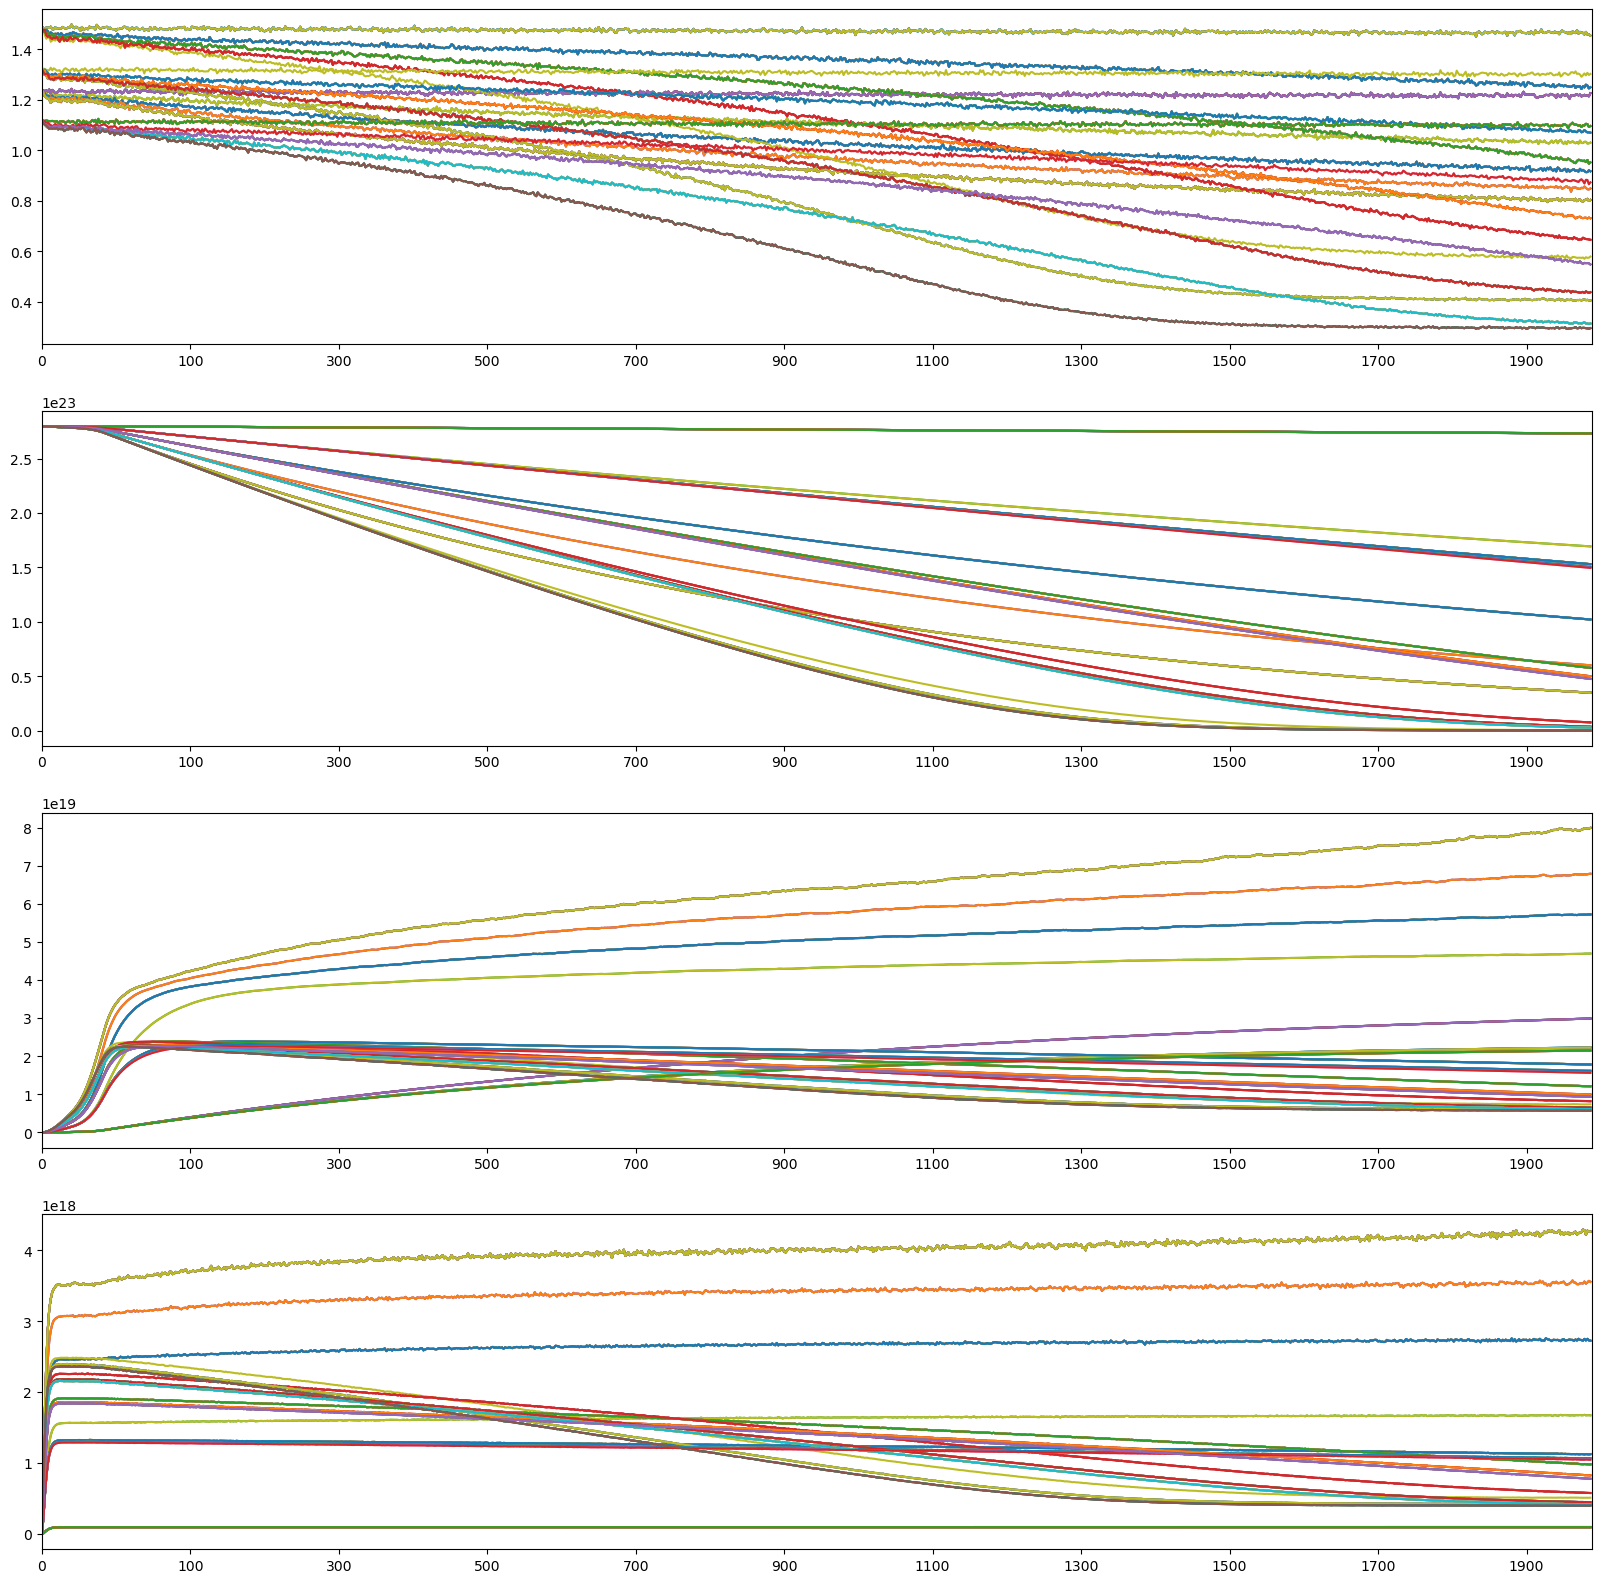

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
for i in tqdm(range(len(os.listdir(neuro_data_path)))):
    df_path = os.listdir(neuro_data_path)[i]
    df_path = os.path.join(neuro_data_path, df_path)
    if not os.path.isdir(df_path):
        continue
    df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
    ax[0].plot(df['k_inf'])
    ax[1].plot(df['U235'])
    ax[2].plot(df['Sm149'])
    ax[3].plot(df['Xe135'])
time_steps = df['timestamps']//3600//24
for _ax in ax:
    xticks = range(0,len(time_steps), 100)
    _ax.set_xticks(xticks, labels=[int(time_steps[i]//100*100) for i in xticks])
    _ax.set_xlim(0, len(time_steps))

In [14]:
pitches_list = list(np.arange(1.0, 3.0, 0.5))
cts = []
for pth in tqdm(os.listdir(neuro_data_path), leave=False):
    dir_path = os.path.join(neuro_data_path, pth)
    if not os.path.isdir(dir_path):
        continue
    cts_path = os.path.join(dir_path, 'context.json')
    df = pd.read_csv(os.path.join(dir_path, 'data.csv'), index_col=0)
    k_end = df.tail(1).k_inf.values[0]

    ctxt = json.load(open(cts_path, 'r')) | {'id':pth, 'kend':k_end}
    cts.append(ctxt)
cts = pd.DataFrame(cts, dtype=float)
pitches = cts.water_volume
for i, p in enumerate(pitches_list):
    pitches = pitches.replace(cts.water_volume.unique()[i],p)
cts['pitch']=pitches.values

cts1 = cts.copy()
uniques = cts1.drop(['id', 'kend'], axis=1).drop_duplicates().index
cts = cts1.loc[uniques]
cts

,enr,power,water_volume,water_density,fuel_volume,fuel_density,cladding_volume,cladding_density,id,kend,pitch
0,3.0,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,0.0,1.226503,1.0
1,3.5,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,1.0,1.226503,1.0
2,4.0,21000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,6.0,1.030816,1.0
3,4.0,41000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,10.0,0.917245,1.0
4,3.5,61000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,13.0,0.849108,1.0
5,3.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,16.0,0.803519,1.0
6,3.5,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,17.0,0.803519,1.0
7,4.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,18.0,0.803519,1.0
8,4.5,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,19.0,0.803519,1.0
10,4.0,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,22.0,1.226503,1.0


In [15]:
for ind in ['enr', 'power', 'pitch']:
    print(ind, len(cts[ind].unique()))

enr 4
power 5
pitch 4


In [16]:
cts.drop(['water_volume', 'water_density', 'fuel_volume','fuel_density', 'cladding_volume', 'cladding_density', 'id'], axis=1).groupby(['enr', 'power', 'pitch']).mean()

kend
enr power   pitch          
3.0 1000.0  1.0    1.226503
            1.5    1.455001
            2.5    1.096437
    21000.0 1.5    1.250061
            2.0    1.070267
            2.5    0.873331
    41000.0 1.0    0.917245
            1.5    0.952396
            2.5    0.548167
    61000.0 2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            1.5    0.579303
            2.0    0.405496
            2.5    0.295606
3.5 1000.0  1.0    1.226503
            1.5    1.455001
            2.5    1.096437
    21000.0 1.0    1.030816
    41000.0 1.0    0.917245
            2.5    0.548167
    61000.0 1.0    0.849108
            2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            2.5    0.295606
4.0 1000.0  1.0    1.226503
            2.0    1.302966
    21000.0 1.0    1.030816
            1.5    1.250061
            2.0    1.070267
            2.5    0.873331
    41000.0 1.0    0.917245
            1.5    0.952396
            2.0    0.731356
            2.5    0.548167
    61000.0 1.5    0.645815
            2.5    0.313969
    81000.0 1.0    0.803519
            2.0    0.405496
4.5 1000.0  1.5    1.455001
    21000.0 1.5    1.250061
            2.0    1.070267
    41000.0 1.0    0.917245
            1.5    0.952396
            2.0    0.731356
    61000.0 1.0    0.849108
            1.5    0.645815
            2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            2.0    0.405496
            2.5    0.295606

In [17]:
cts.water_volume.unique()

array([ 155.48716814, 1081.05181843, 2376.84232884, 4042.85869937])

Text(0, 0.5, 'Число кампаний')

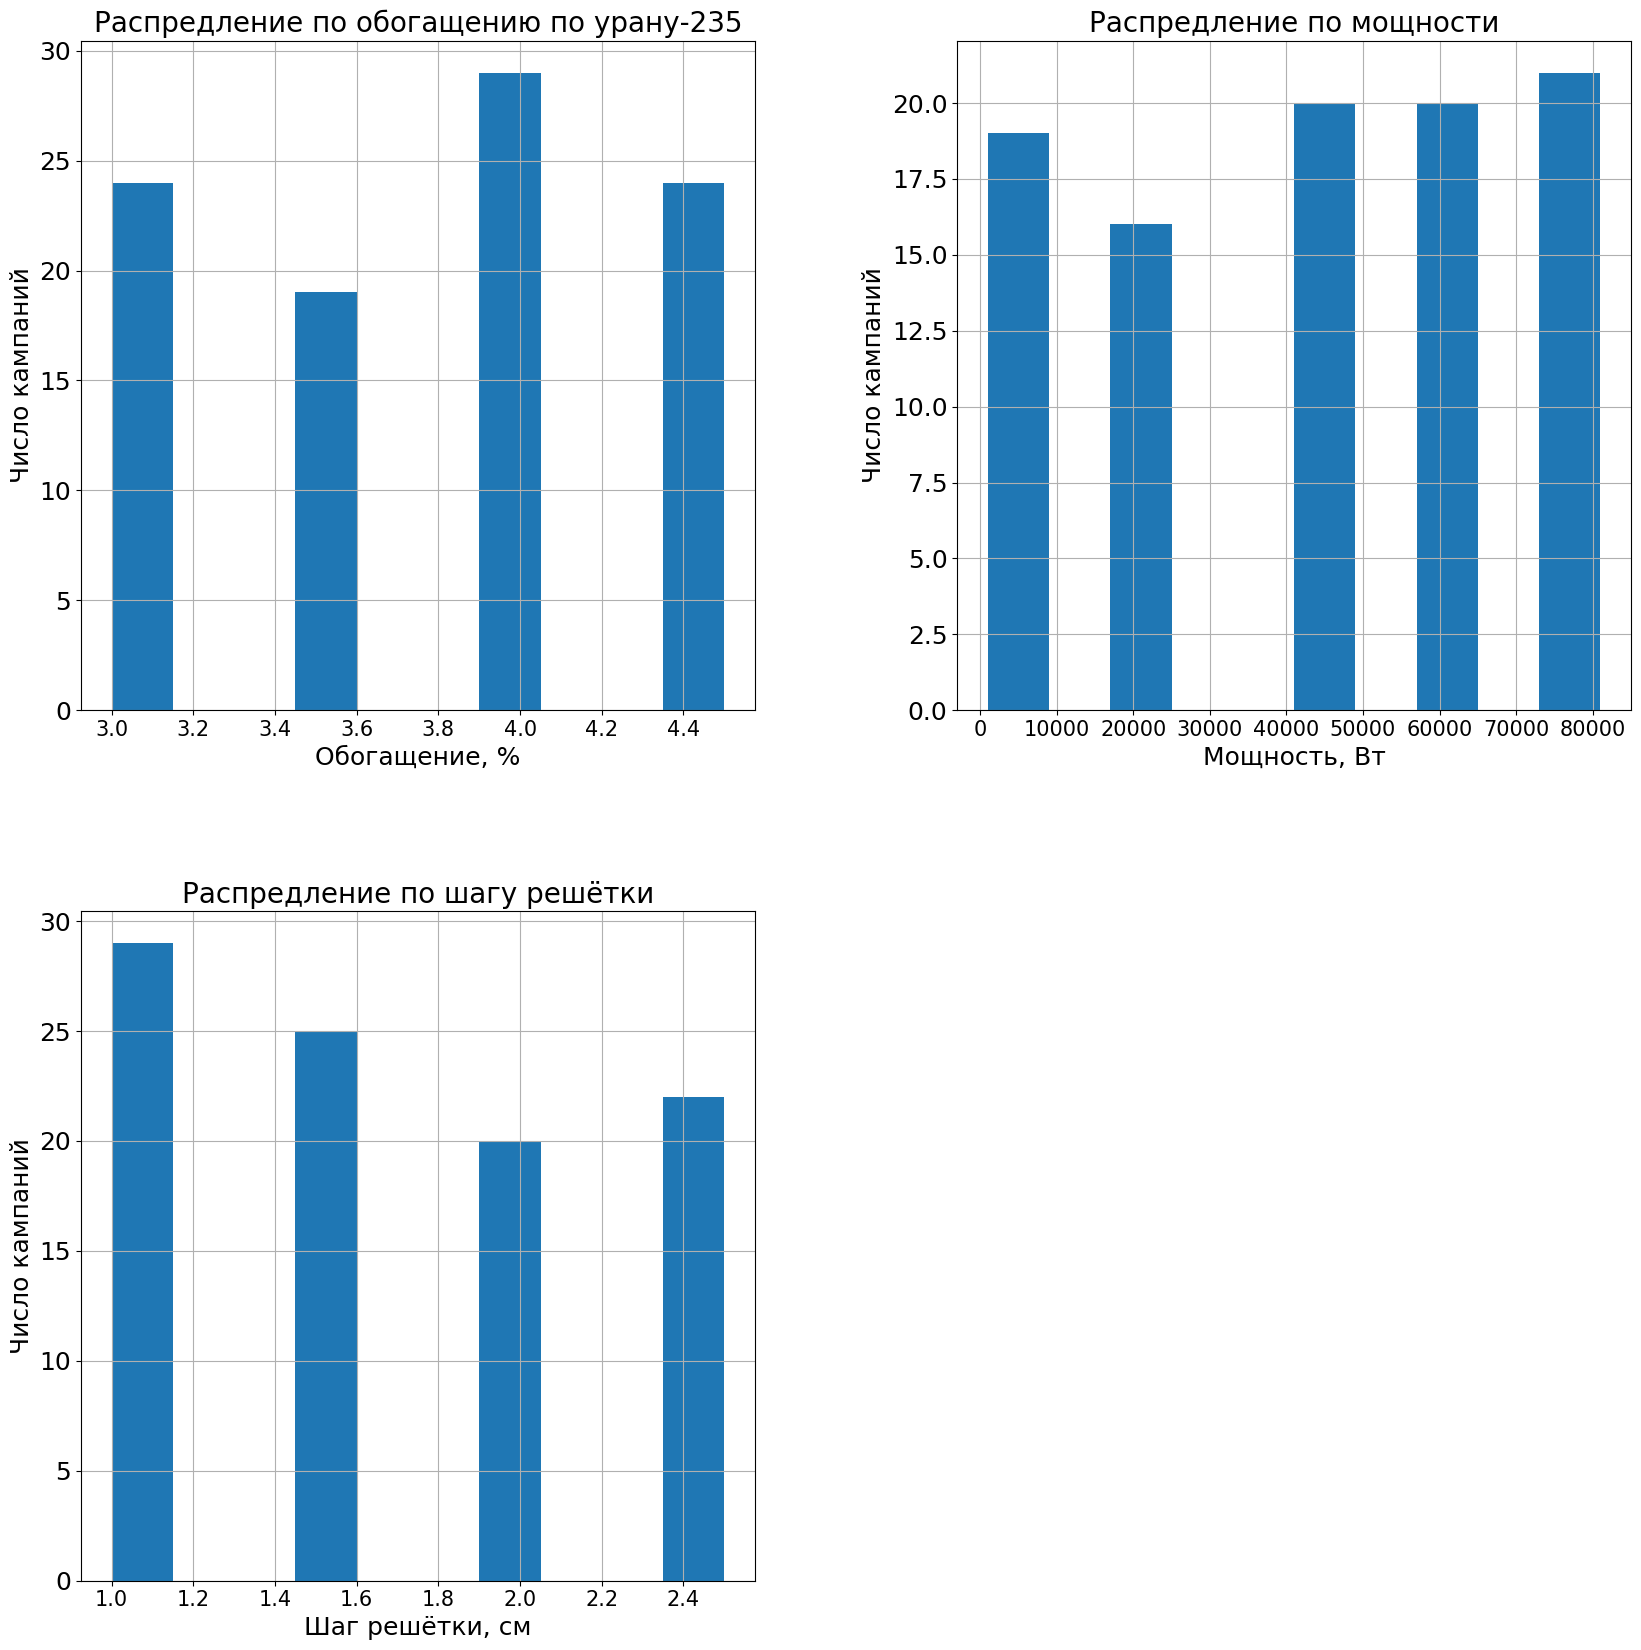

In [18]:
hists = cts1[['enr', 'power', 'pitch']].hist(figsize=(20, 20), ylabelsize=18, xlabelsize=15, )
hists[0,0].set_title('Распредление по обогащению по урану-235')
hists[0,0].title.set_fontsize(20)
hists[0,0].set_xlabel('Обогащение, %', size=18)
hists[0,0].set_ylabel('Число кампаний', size=18)


hists[0,1].set_title('Распредление по мощности')
hists[0,1].title.set_fontsize(20)
hists[0,1].set_xlabel('Мощность, Вт', size=18)
hists[0,1].set_ylabel('Число кампаний', size=18)


hists[1,0].set_title('Распредление по шагу решётки')
hists[1,0].title.set_fontsize(20)
hists[1,0].set_xlabel('Шаг решётки, см', size=18)
hists[1,0].set_ylabel('Число кампаний', size=18)




TypeError: join() argument must be str, bytes, or os.PathLike object, not 'float64'

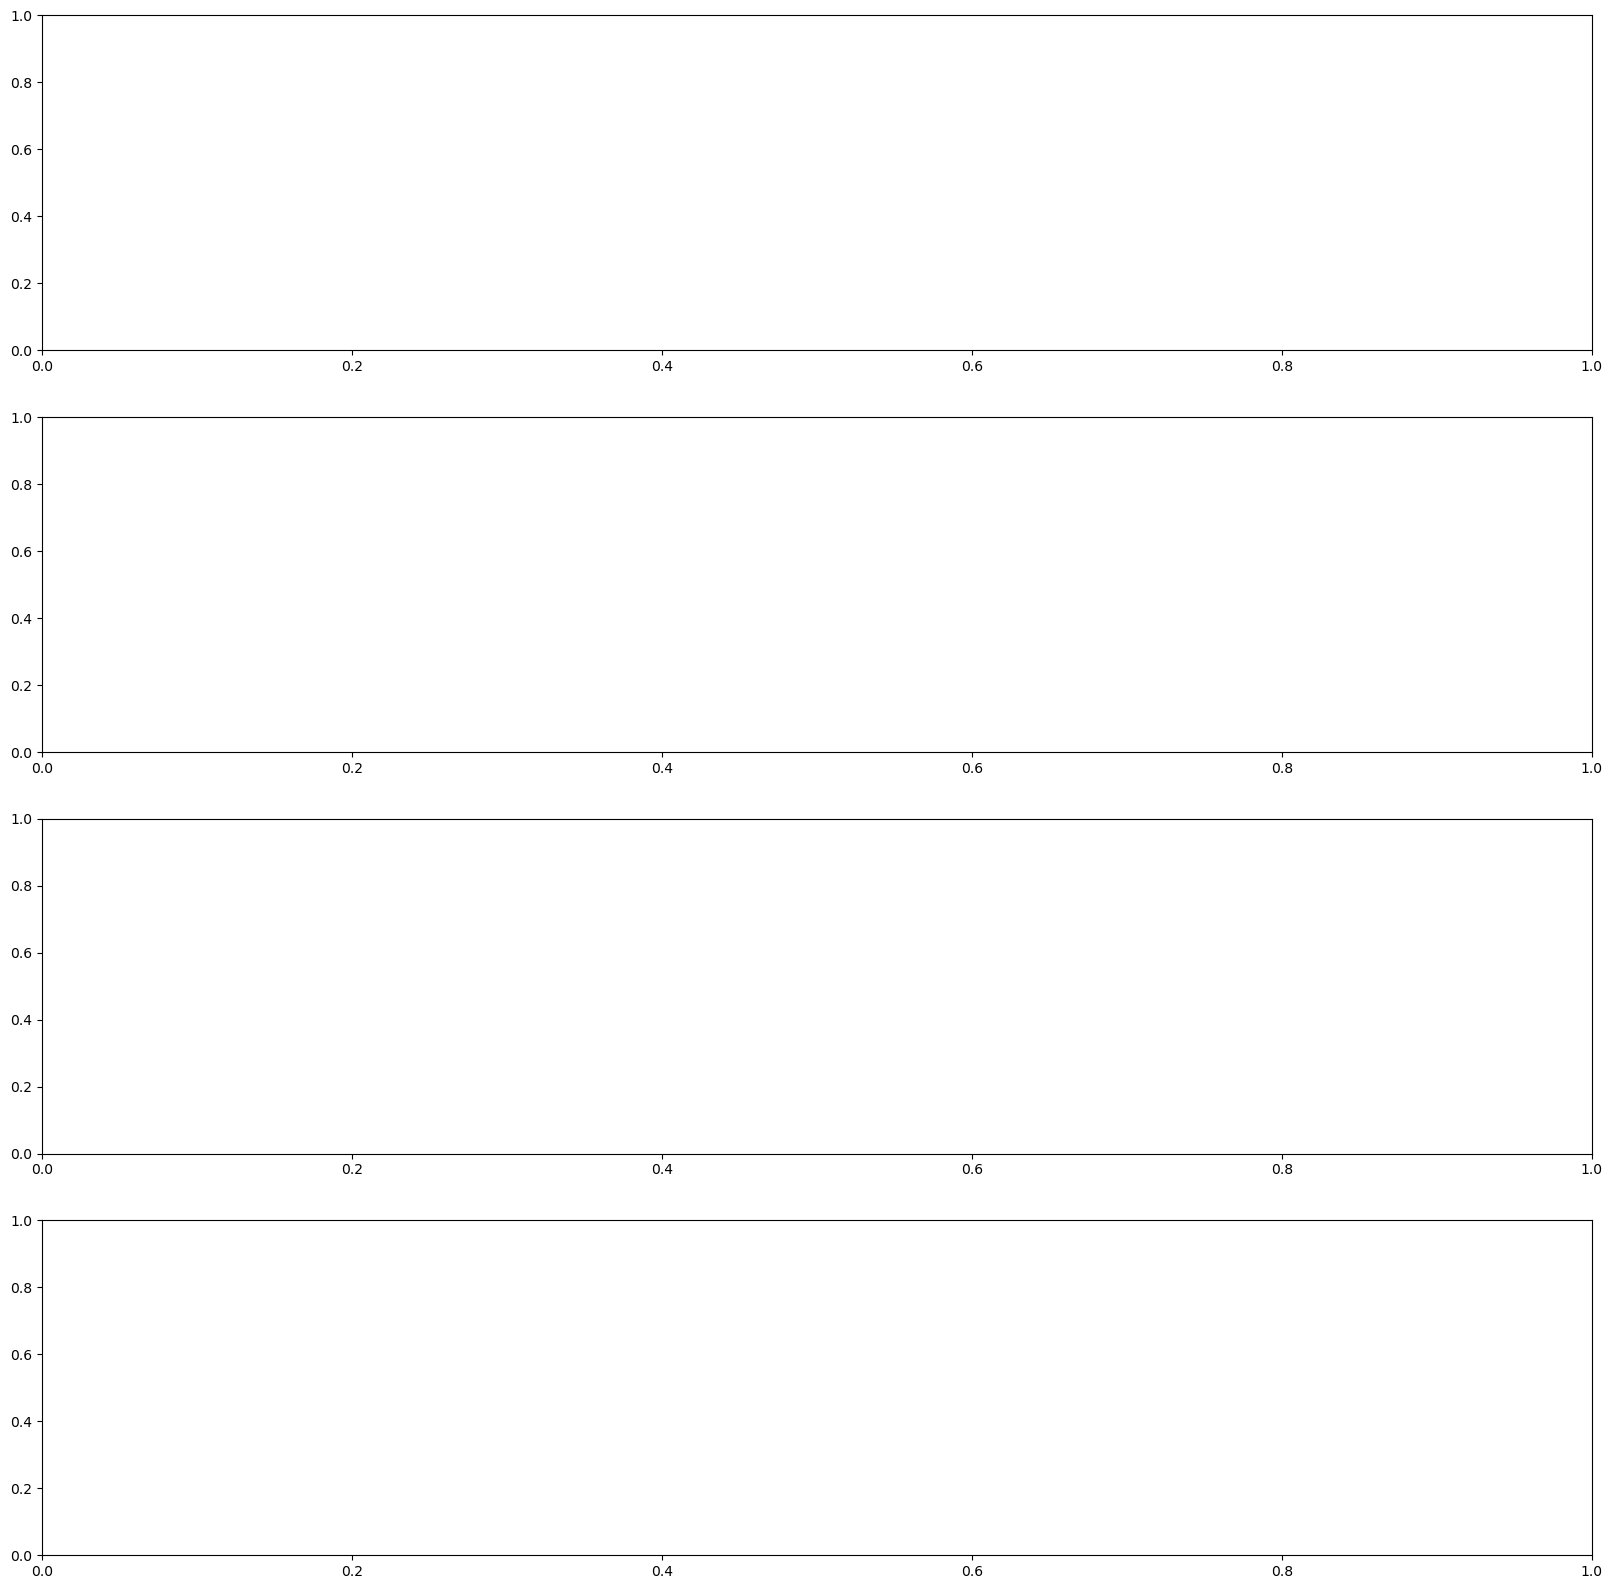

In [19]:
low_power = cts[cts['power']==1000]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
isos = ['k_inf', 'U235', 'Sm149', 'Xe135']
colors = ['r', 'g', 'b', 'c', 'm']
for enr, c in zip(low_power.enr.unique(), colors):
    ids = low_power.loc[low_power.enr.isin([enr]), 'id']
    # _id = ids.values[0]
    for _id in ids.values:
        df_path = os.path.join(neuro_data_path, _id)
        if not os.path.isdir(df_path):
            continue
        df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
        for ax_, iso in zip(ax, isos):
            ax_.plot(df[iso], label=f"{enr}%", alpha=0.6, color=c)
            ax_.legend()
            ax_.grid(True)
            ax_.set_ylabel(f"{iso}")




TypeError: join() argument must be str, bytes, or os.PathLike object, not 'float64'

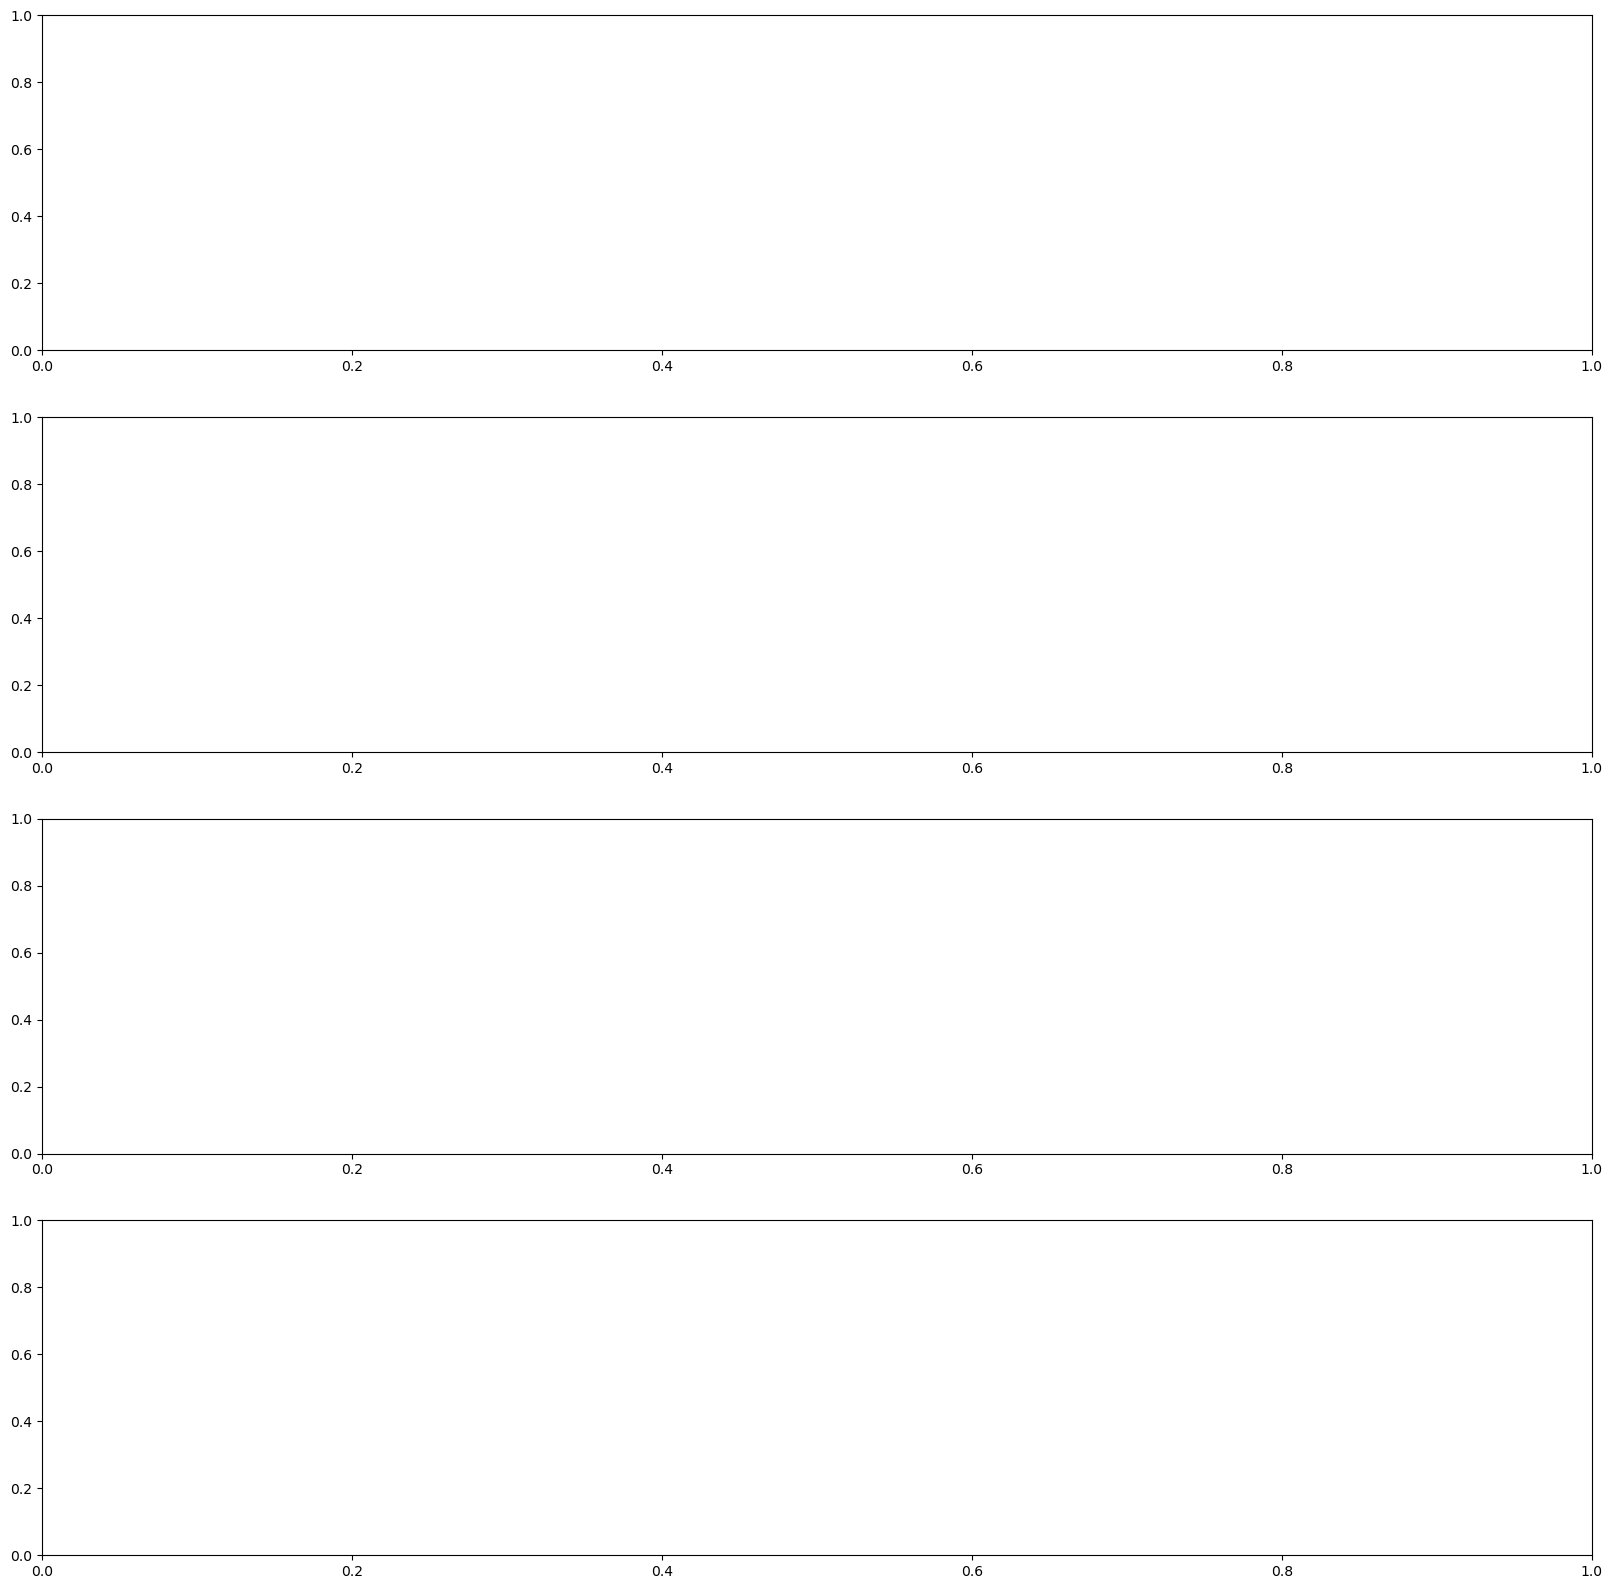

In [20]:
high_power = cts[cts['power']==81000]
high_power = high_power.loc[high_power.water_volume.isin([155.4871681372756])]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
isos = ['k_inf', 'U235', 'Sm149', 'Xe135']
colors = ['r', 'g', 'b', 'm', 'c']
lines = {x:{} for x in isos}
for enr, c in zip(high_power.enr.unique(), colors):
    ids = high_power.loc[high_power.enr.isin([enr]), 'id']
    # _id = ids.values[0]
    for _id in ids.values:
        df_path = os.path.join(neuro_data_path, _id)
        if not os.path.isdir(df_path):
            continue
        df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
        for ax_, iso in zip(ax, isos):
            line, = ax_.plot(df[iso], alpha=0.9, color=c, linestyle='--')
            if lines[iso].get(str(enr), None) is None:
                lines[iso][str(enr)] = line
                line.set_label(f"{enr}%")
            # ax_.legend()
            ax_.grid(True)
            ax_.set_ylabel(f"{iso}")
for _ax in ax:
    _ax.legend()


In [21]:
high_enr = cts[cts['enr']==4.5].sort_values('power', ascending=True, inplace=False)
for ww in high_enr.water_volume.unique():
    print(ww)
    enrs = high_enr.loc[high_enr.water_volume == ww, 'power'].unique()
    print(enrs)

1081.0518184318946
[ 1000. 21000. 41000. 61000.]
2376.8423288443605
[21000. 41000. 61000. 81000.]
155.4871681372756
[41000. 61000. 81000.]
4042.858699374674
[61000. 81000.]


In [44]:
cts[cts['enr']==3.0][cts.pitch==2.5].sort_values('power', ascending=True, inplace=False)

/tmp/ipykernel_796675/2586128214.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cts[cts['enr']==3.0][cts.pitch==2.5].sort_values('power', ascending=True, inplace=False)


,enr,power,water_volume,water_density,fuel_volume,fuel_density,cladding_volume,cladding_density,id,kend,pitch
74,3.0,1000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,240.0,1.096437,2.5
93,3.0,21000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,304.0,0.873331,2.5
94,3.0,41000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,308.0,0.548167,2.5
77,3.0,61000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,252.0,0.313969,2.5
80,3.0,81000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,256.0,0.295606,2.5


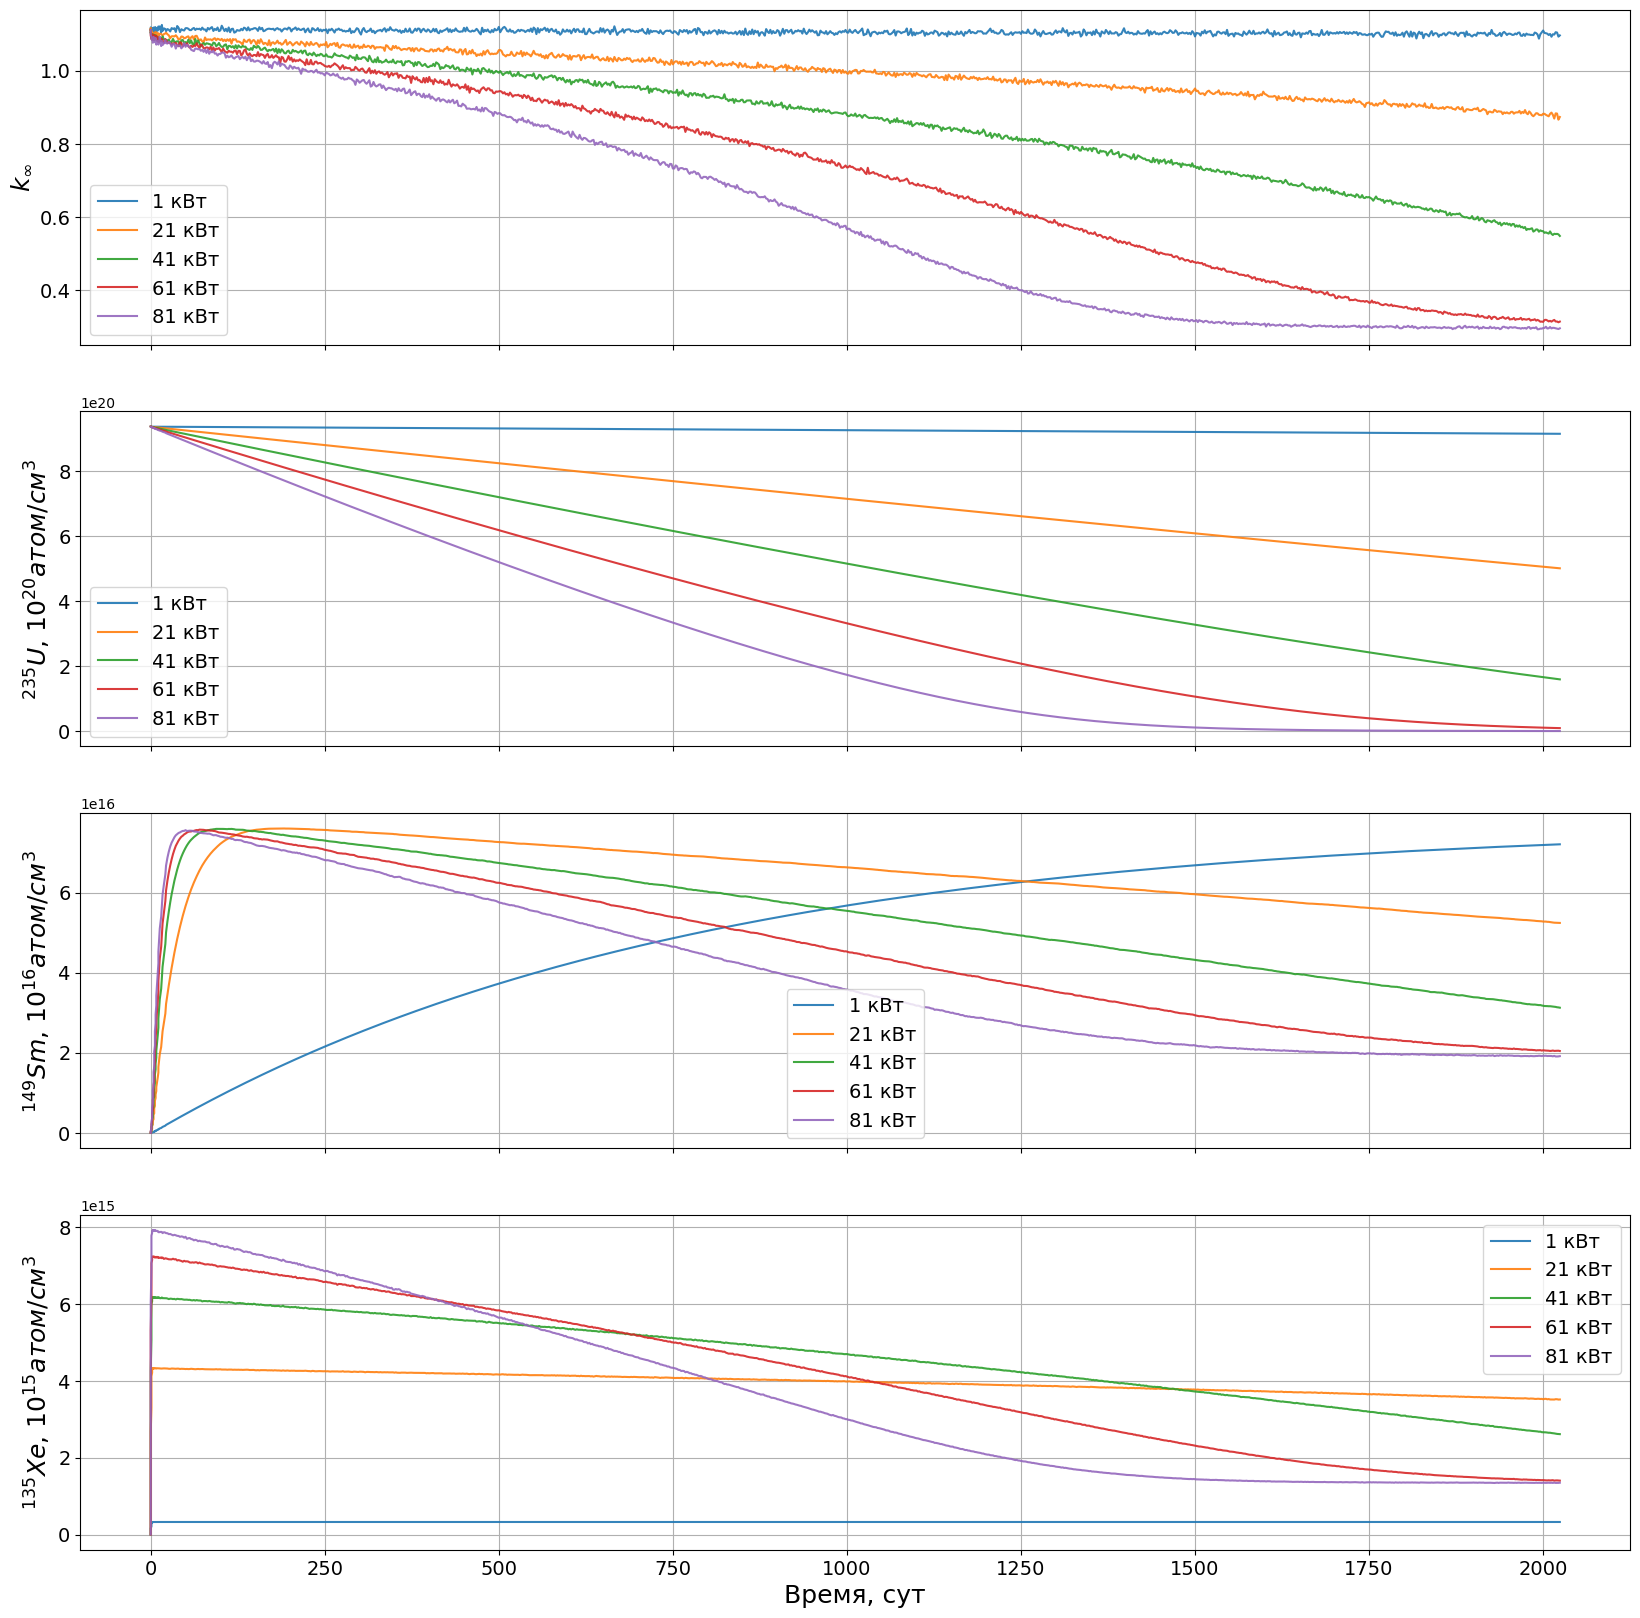

In [23]:
low_enr = cts[cts['enr']==3.0].sort_values('power', ascending=True, inplace=False)
low_enr = low_enr[low_enr.water_volume==4042.858699374674]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20), sharex=True, sharey=False)
isos = ['k_inf', 'U235', 'Sm149', 'Xe135']

for power in low_enr.power.unique():
    ids = low_enr.loc[low_enr.power.isin([power]), 'id']
    # _id = ids.values[0]
    for _id in ids.values:
        df_path = os.path.join(neuro_data_path, f"{int(_id)}")
        if not os.path.isdir(df_path):
            continue
        fv = low_enr.loc[low_enr.id == _id, 'fuel_volume'].values[0]
        df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
        time_steps = df['timestamps']//3600//24
        xticks = range(0,len(time_steps), 100)
        for ax_, iso in zip(ax, isos):
            data = df[iso]
            ylbl = "$k_{\infty}$"
            if iso != 'k_inf':
                data/=fv
                let, num = iso[:-3], iso[-3:]
                ylbl = f"$^{{{num}}}{let}$, "

                _pow=1
                if iso == 'U235':
                    _pow = 20
                elif iso == 'Sm149':
                    _pow = 16
                elif iso == 'Xe135':
                    _pow = 15

                if _pow > 1:
                    ylbl+=f"$10^{{{_pow}}}$"

                ylbl += "$атом/см^3$"
            ax_.plot(time_steps,data, label=f"{power//1000:.0f} кВт", alpha=0.9)
            ax_.legend(fontsize=14)
            ax_.grid(True)
            ax_.set_ylabel(ylbl, size=18)
            ax_.axis('tight')
            ax_.tick_params(axis='both', which='major', labelsize=14)
        ax_.set_xlabel(f"Время, сут", size=18)

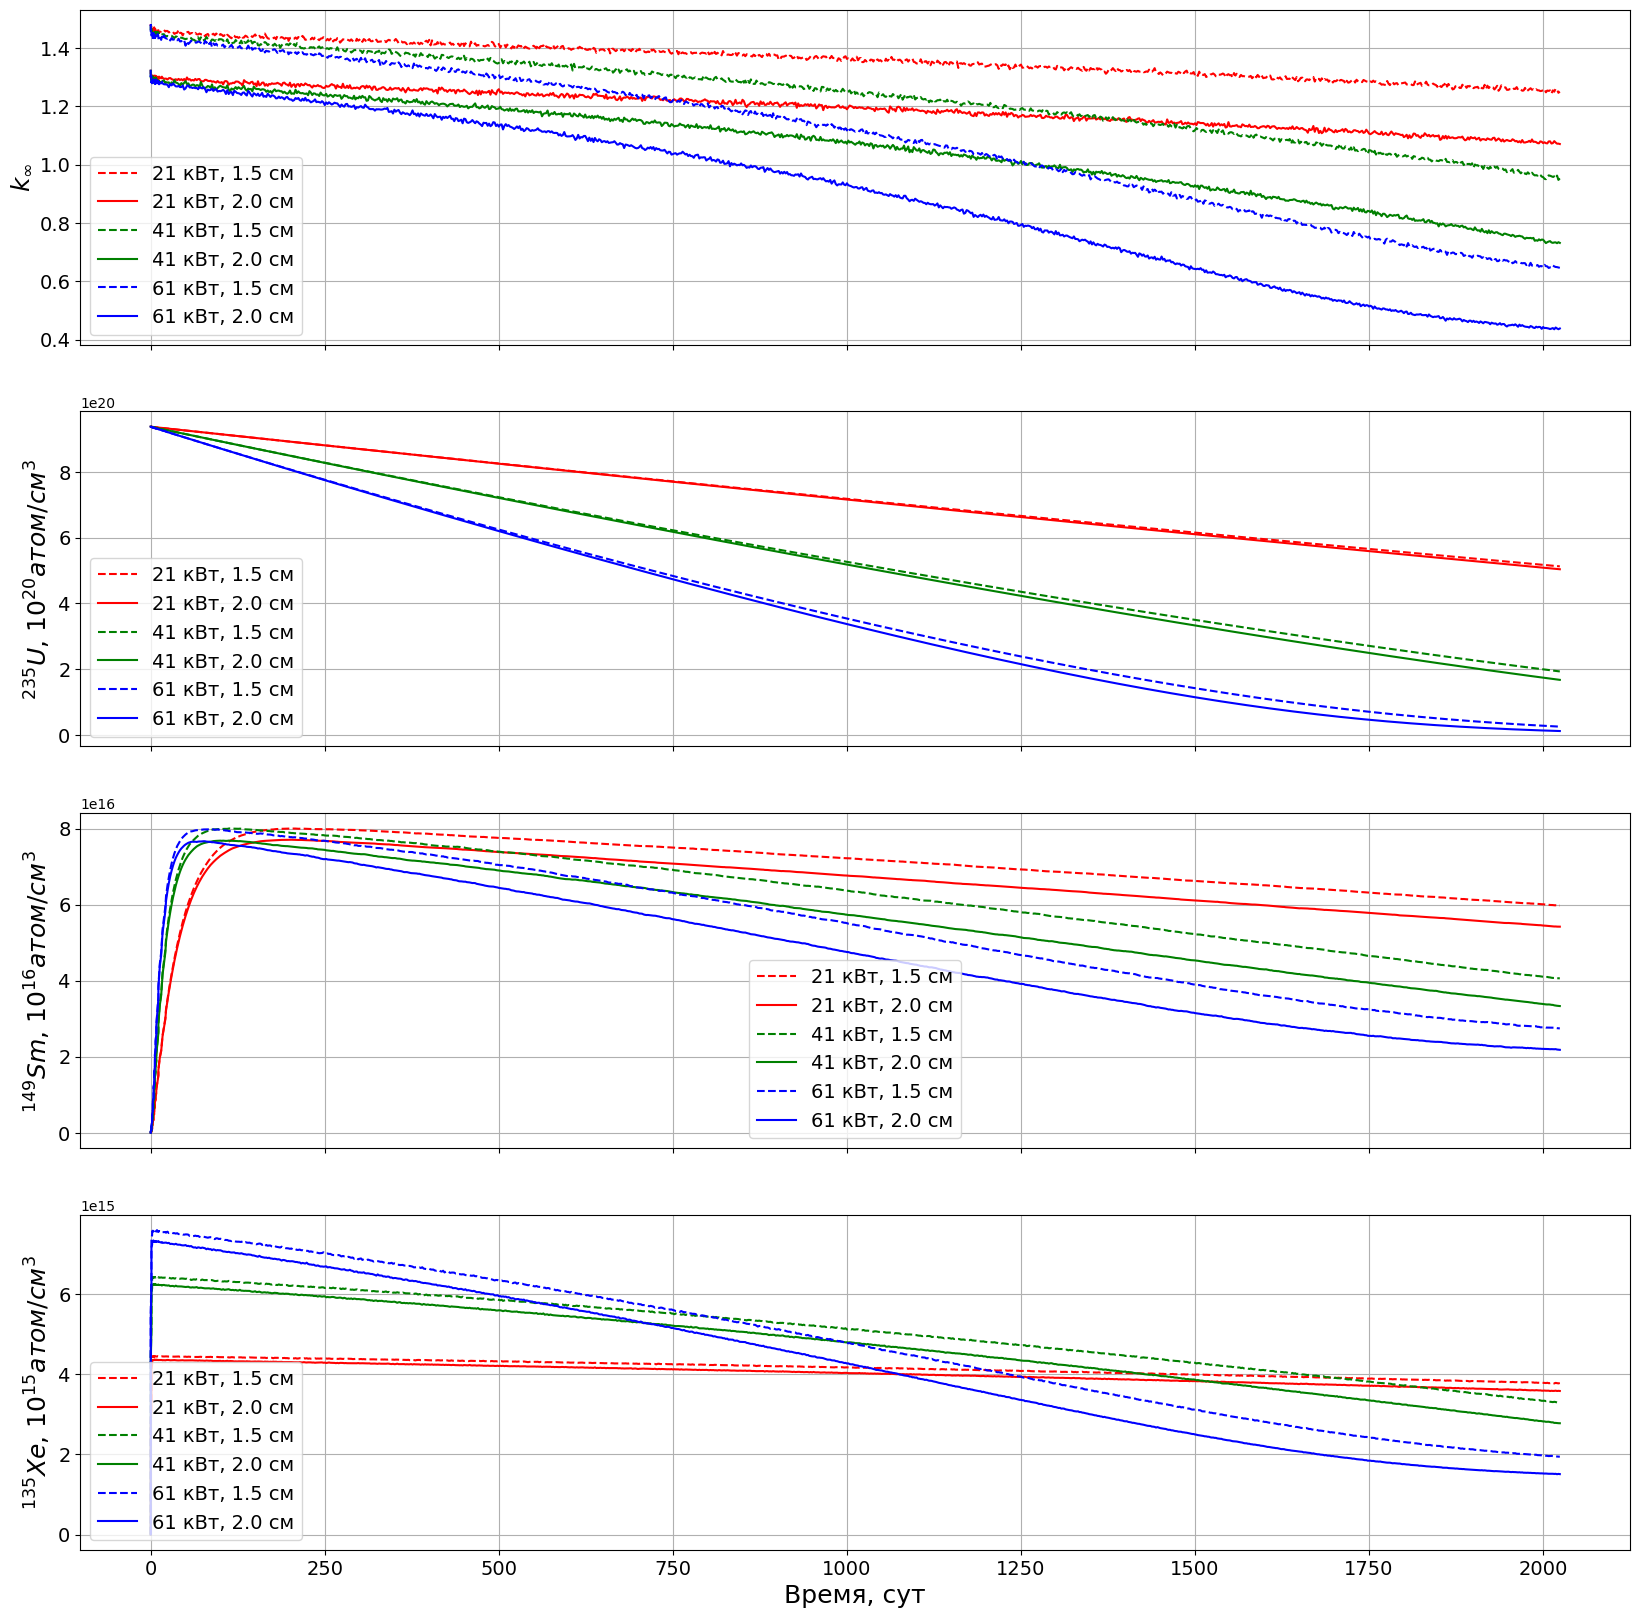

In [114]:
high_enr = cts[cts['enr']==4.5].sort_values('power', ascending=True, inplace=False)
high_enr = high_enr[high_enr.water_volume.isin([1081.0518184318946, 2376.8423288443605])]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20), sharex=True, sharey=False)
isos = ['k_inf', 'U235', 'Sm149', 'Xe135']
colors = ['r', 'g', 'b']
for power, color in zip(high_enr.power.unique()[1:-1], colors):
    ids = high_enr.loc[high_enr.power.isin([power]), 'id']
    wvs = high_enr.loc[high_enr.power.isin([power]), 'water_volume']

    # _id = ids.values[0]
    for _id, wv in zip(ids, wvs):
        df_path = os.path.join(neuro_data_path, f"{_id:.0f}")
        if wv>1500:
            linestyle = '-'
        else:
            linestyle = '--'
        if not os.path.isdir(df_path):
            continue
        df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
        time_steps = df['timestamps']//3600//24
        fv = high_enr.loc[high_enr.id == _id, 'fuel_volume'].values[0]
        pitch = high_enr.loc[high_enr.id == _id, 'pitch'].values[0]
        for ax_, iso in zip(ax, isos):
            data = df[iso]
            ylbl = "$k_{\infty}$"
            if iso != 'k_inf':
                data/=fv
                let, num = iso[:-3], iso[-3:]
                ylbl = f"$^{{{num}}}{let}$, "

                _pow=1
                if iso == 'U235':
                    _pow = 20
                elif iso == 'Sm149':
                    _pow = 16
                elif iso == 'Xe135':
                    _pow = 15

                if _pow > 1:
                    ylbl+=f"$10^{{{_pow}}}$"

                ylbl += "$атом/см^3$"

            ax_.plot(time_steps, data, label=f"{power/1000:.0f} кВт, {pitch} см", alpha=1, c=color, linestyle=linestyle)
            ax_.legend(fontsize=14)
            ax_.grid(True)
            ax_.set_ylabel(ylbl, size=18)
            ax_.axis('tight')
            ax_.tick_params(axis='both', which='major', labelsize=14)
        ax_.set_xlabel(f"Время, сут", size=18)

In [25]:
low_power.loc[low_power.enr.isin([3.0,4.5])]

,enr,power,water_volume,water_density,fuel_volume,fuel_density,cladding_volume,cladding_density,id,kend,pitch
0,3.0,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,0.0,1.226503,1.0
29,3.0,1000.0,1081.051818,1.0,298.451302,8.3,537.212344,6.56,80.0,1.455001,1.5
40,4.5,1000.0,1081.051818,1.0,298.451302,8.3,537.212344,6.56,103.0,1.455001,1.5
74,3.0,1000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,240.0,1.096437,2.5


In [26]:
kends = []
for _id in cts.id.unique():
    df_path = os.path.join(neuro_data_path, _id)
    if not os.path.isdir(df_path):
        continue
    data = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
    kend = data.tail(1).k_inf


TypeError: join() argument must be str, bytes, or os.PathLike object, not 'float64'

In [27]:
aggr = cts1.drop(['water_volume', 'water_density', 'fuel_volume','fuel_density', 'cladding_volume', 'cladding_density', 'id'], axis=1).groupby(['enr', 'power', 'pitch']).mean()
aggr

kend
enr power   pitch          
3.0 1000.0  1.0    1.226503
            1.5    1.455001
            2.5    1.096437
    21000.0 1.5    1.250061
            2.0    1.070267
            2.5    0.873331
    41000.0 1.0    0.917245
            1.5    0.952396
            2.5    0.548167
    61000.0 2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            1.5    0.579303
            2.0    0.405496
            2.5    0.295606
3.5 1000.0  1.0    1.226503
            1.5    1.455001
            2.5    1.096437
    21000.0 1.0    1.030816
    41000.0 1.0    0.917245
            2.5    0.548167
    61000.0 1.0    0.849108
            2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            2.5    0.295606
4.0 1000.0  1.0    1.226503
            2.0    1.302966
    21000.0 1.0    1.030816
            1.5    1.250061
            2.0    1.070267
            2.5    0.873331
    41000.0 1.0    0.917245
            1.5    0.952396
            2.0    0.731356
            2.5    0.548167
    61000.0 1.5    0.645815
            2.5    0.313969
    81000.0 1.0    0.803519
            2.0    0.405496
4.5 1000.0  1.5    1.455001
    21000.0 1.5    1.250061
            2.0    1.070267
    41000.0 1.0    0.917245
            1.5    0.952396
            2.0    0.731356
    61000.0 1.0    0.849108
            1.5    0.645815
            2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            2.0    0.405496
            2.5    0.295606

In [29]:
powers = cts1.power.unique()
enrs = cts1.enr.unique()
pitches = cts1.pitch.unique()
power_enr = np.zeros((len(powers), len(enrs)))
power_pitch = np.zeros((len(powers), len(pitches)))
enr_pitch = np.zeros((len(enrs), len(pitches)))

In [30]:
pitches, powers, enrs

(array([1. , 1.5, 2. , 2.5]),
 array([ 1000., 21000., 41000., 61000., 81000.]),
 array([3. , 3.5, 4. , 4.5]))

In [31]:
from itertools import product
for enr, power, pitch in product(enrs, powers, pitches):
    # enr, power, pitch = ind
    enr, power, pitch = float(enr), float(power), float(pitch)
    try:
        k = aggr.loc[(enr, power, pitch), 'kend']
    except KeyError:
        k=np.nan
    finally:
        enr = np.where(enrs == enr)[0][0]
        power = np.where(powers == power)[0][0]
        pitch = np.where(pitches == pitch)[0][0]

        power_enr[power, enr] = k
        power_pitch[power, pitch] = k
        enr_pitch[enr, pitch] = k

In [32]:
power_enr

array([[1.09643672, 1.09643672,        nan,        nan],
       [0.87333111,        nan, 0.87333111,        nan],
       [0.54816681, 0.54816681, 0.54816681,        nan],
       [0.31396889, 0.31396889, 0.31396889, 0.31396889],
       [0.29560584, 0.29560584,        nan, 0.29560584]])

In [33]:
power_pitch

array([[       nan, 1.45500103,        nan,        nan],
       [       nan, 1.2500612 , 1.07026691,        nan],
       [0.91724466, 0.95239635, 0.73135625,        nan],
       [0.84910824, 0.64581507, 0.43796738, 0.31396889],
       [0.80351941,        nan, 0.40549552, 0.29560584]])

In [34]:
enr_pitch

array([[0.80351941, 0.57930338, 0.40549552, 0.29560584],
       [0.80351941,        nan,        nan, 0.29560584],
       [0.80351941,        nan, 0.40549552,        nan],
       [0.80351941,        nan, 0.40549552, 0.29560584]])

In [35]:
cts1[cts1.pitch==1.0][cts1.enr==3.0]

/tmp/ipykernel_796675/2276402653.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cts1[cts1.pitch==1.0][cts1.enr==3.0]


,enr,power,water_volume,water_density,fuel_volume,fuel_density,cladding_volume,cladding_density,id,kend,pitch
0,3.0,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,0.0,1.226503,1.0
5,3.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,16.0,0.803519,1.0
11,3.0,41000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,28.0,0.917245,1.0
15,3.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,36.0,0.803519,1.0
23,3.0,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,60.0,1.226503,1.0
25,3.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,76.0,0.803519,1.0


3.0 1000.0 1.0 1.2265027031496194 0 4
3.0 41000.0 1.0 0.9172446591188572 0 2
3.0 81000.0 1.0 0.8035194114078539 0 0
3.0 1000.0 1.5 1.455001031440752 1 4
3.0 21000.0 1.5 1.2500612041056174 1 3
3.0 41000.0 1.5 0.9523963510778214 1 2
3.0 81000.0 1.5 0.5793033818953244 1 0
3.0 21000.0 2.0 1.0702669061494043 2 3
3.0 61000.0 2.0 0.4379673815076438 2 1
3.0 81000.0 2.0 0.405495520077286 2 0
3.0 1000.0 2.5 1.0964367205654897 3 4
3.0 21000.0 2.5 0.8733311074212482 3 3
3.0 41000.0 2.5 0.5481668094965361 3 2
3.0 61000.0 2.5 0.3139688880466064 3 1
3.0 81000.0 2.5 0.2956058418925326 3 0
3.5 1000.0 1.0 1.2265027031496178 0 4
3.5 21000.0 1.0 1.0308158671751153 0 3
3.5 41000.0 1.0 0.917244659118854 0 2
3.5 61000.0 1.0 0.8491082431605005 0 1
3.5 81000.0 1.0 0.8035194114078517 0 0
3.5 1000.0 1.5 1.455001031440755 1 4
3.5 61000.0 2.0 0.4379673815076455 2 1
3.5 1000.0 2.5 1.096436720565489 3 4
3.5 41000.0 2.5 0.5481668094965361 3 2
3.5 61000.0 2.5 0.3139688880466066 3 1
3.5 81000.0 2.5 0.2956058418925332 3

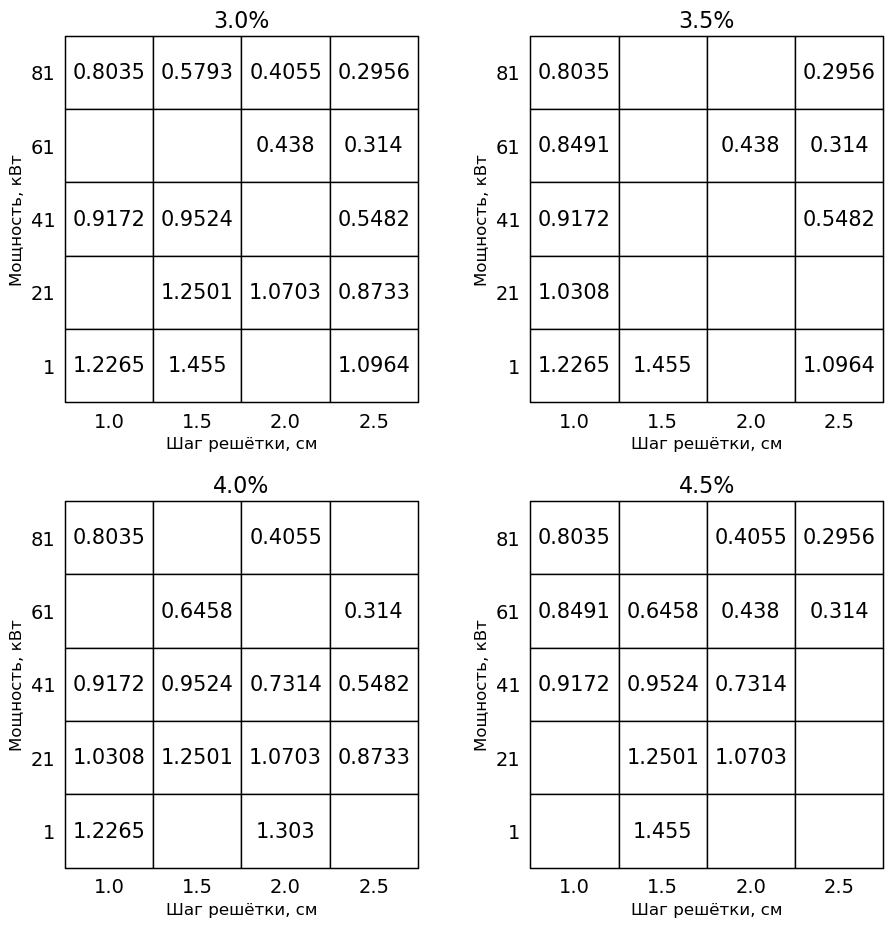

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.tight_layout(pad=5)
for n, enr in enumerate(np.arange(3.0,5, 0.5)):
    mat = np.full(power_pitch.shape, np.nan)
    for pitch, power in product(pitches, powers):
        pitch, power = float(pitch), float(power)
        try:
            k = cts.sort_values(['enr', 'power', 'pitch']).loc[cts.power==power].loc[cts.pitch==pitch].loc[cts.enr==enr, 'kend'].values
            assert len(k)>0
            k=k[0]            
            
        except KeyError:
            continue
        except AssertionError:
            continue
        else:
            x = np.where(pitches==pitch)[0][0]
            y = np.where(powers==power)[0][0]
            y = len(powers) - y-1
            mat[y,x] = round(k,4)
            print(enr, power, pitch, k, x, y)

    df = pd.DataFrame(mat)

    axes[n//2, n%2].set_title(f"{enr}%", fontsize=16)
    table = axes[n//2, n%2].table(df.fillna('').values, bbox=(0, 0,1,1), rowLoc='center', cellLoc='center')
    table.set_fontsize(18)
    axes[n//2, n%2].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

    axes[n//2, n%2].set_xticks(np.arange(0.25/2, 1.1, 0.25), labels=np.arange(1, 3, 0.5))
    axes[n//2, n%2].set_xlabel(f"Шаг решётки, см", fontsize=12)

    axes[n//2, n%2].set_yticks(np.arange(0.1, 1.1, 0.2), labels=np.arange(1, 100, 20))
    axes[n//2, n%2].set_ylabel(f"Мощность, кВт", fontsize=12)

    axes[n//2, n%2].tick_params(axis='both', which='major', labelsize=14, )

    # axes[n//2, n%2].grid(True)
    # for i in range(mat.shape[0]):
    #     for j in range(mat.shape[1]):
    #         if mat[i, j] >0:
    #             axes[n//2, n%2].text(j, i, f"{mat[i, j]:.3f}", horizontalalignment='center', verticalalignment='center', color='black')

In [113]:
df = cts[['power', 'pitch', 'kend']].drop_duplicates()
powers, pitches = df.power.unique().tolist(), df.pitch.unique().tolist()
mat = np.zeros((len(powers), len(pitches)))
for i, power in enumerate(powers):
    for j, pitch in enumerate(pitches):
        k = df.loc[df.power==power].loc[df.pitch==pitch, 'kend'].values.mean()
        k = round(k,4)
        mat[i,j] = k 
        print(power, pitch, k)
pd.DataFrame(mat).to_csv('pictures/kend.csv')

1000.0 1.0 1.2265
1000.0 1.5 1.455
1000.0 2.0 1.303
1000.0 2.5 1.0964
21000.0 1.0 1.0308
21000.0 1.5 1.2501
21000.0 2.0 1.0703
21000.0 2.5 0.8733
41000.0 1.0 0.9172
41000.0 1.5 0.9524
41000.0 2.0 0.7314
41000.0 2.5 0.5482
61000.0 1.0 0.8491
61000.0 1.5 0.6458
61000.0 2.0 0.438
61000.0 2.5 0.314
81000.0 1.0 0.8035
81000.0 1.5 0.5793
81000.0 2.0 0.4055
81000.0 2.5 0.2956


In [39]:
cts.round(6).groupby('kend').count()['enr']

kend
0.295606    3
0.313969    4
0.405496    3
0.437967    3
0.548167    3
0.579303    1
0.645815    2
0.731356    2
0.803519    4
0.849108    2
0.873331    2
0.917245    4
0.952396    3
1.030816    2
1.070267    3
1.096437    2
1.226503    3
1.250061    3
1.302966    1
1.455001    3
Name: enr, dtype: int64

In [40]:
len(cts)

53

In [91]:
u5 = 0.05060678291113409 * 235
u8= 0.9487090831661896 * 238
u5 / (u5+u8)

0.050035030324883864